In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [5]:
windata=pd.read_csv('winedataset.csv')
windata.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color intensity,Hue,diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
windata.tail()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color intensity,Hue,diluted_wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [7]:
df=pd.DataFrame(data=windata)
df

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color intensity,Hue,diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
df.shape

(178, 14)

In [9]:
df.dtypes

Class                     int64
Alcohol                 float64
Malic_acid              float64
Ash                     float64
Alcalinity_of_ash       float64
Magnesium                 int64
Total_phenols           float64
Flavanoids              float64
Nonflavanoid_phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
diluted_wines           float64
Proline                   int64
dtype: object

In [10]:
df.columns

Index(['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'diluted_wines',
       'Proline    '],
      dtype='object')

In [11]:
df.diluted_wines

0      3.92
1      3.40
2      3.17
3      3.45
4      2.93
       ... 
173    1.74
174    1.56
175    1.56
176    1.62
177    1.60
Name: diluted_wines, Length: 178, dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                   178 non-null int64
Alcohol                 178 non-null float64
Malic_acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity_of_ash       178 non-null float64
Magnesium               178 non-null int64
Total_phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color intensity         178 non-null float64
Hue                     178 non-null float64
diluted_wines           178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [13]:
df.describe()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color intensity,Hue,diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


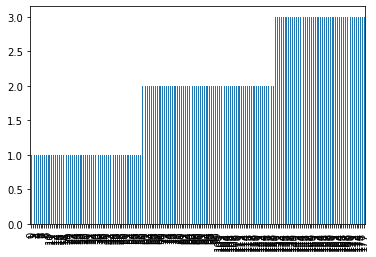

In [14]:
df['Class'].plot.bar()

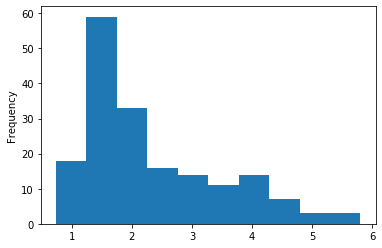

In [15]:
df['Malic_acid'].plot.hist()

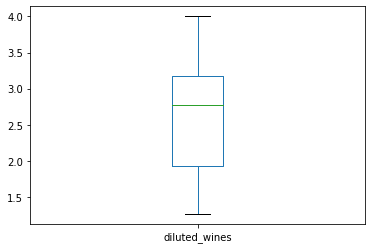

In [16]:
df['diluted_wines'].plot.box()

In [17]:
df.keys()

Index(['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'diluted_wines',
       'Proline    '],
      dtype='object')

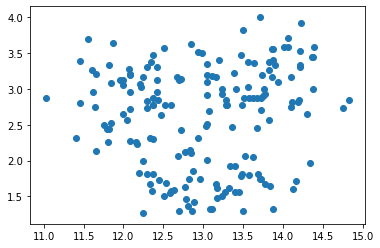

In [18]:
plt.scatter(df['Alcohol'],df['diluted_wines'])
plt.show()

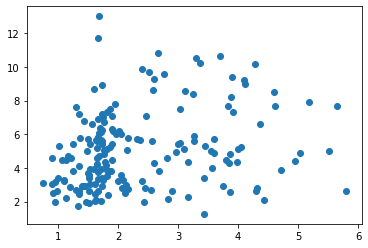

In [19]:
plt.scatter(df['Malic_acid'],df['Color intensity'])
plt.show()

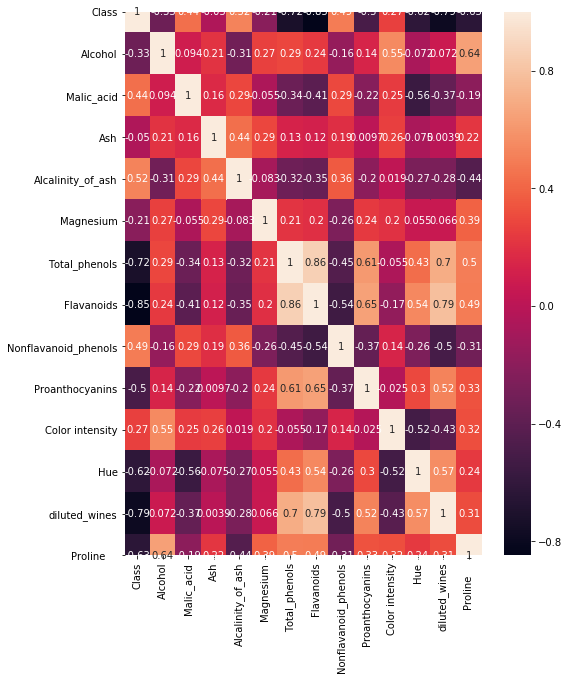

In [20]:
corr_hmap=df.corr()
plt.figure(figsize=(8,10))
sns.heatmap(corr_hmap,annot=True)
plt.show()

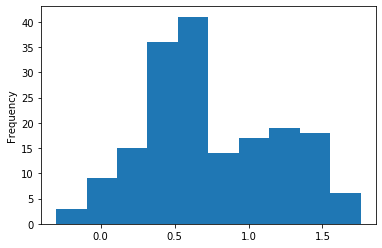

In [21]:
df['Malic_acid']=np.log(df['Malic_acid'])                       # This is also use to Removing the outlier
df['Malic_acid'].plot.hist()

In [22]:
from scipy.stats import boxcox                                      #Removing the outlier
df['Ash']=boxcox(df['Ash'],0)

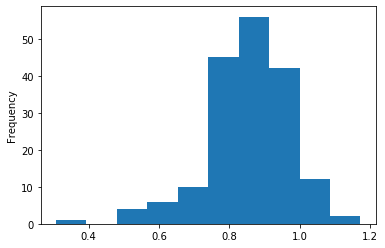

In [23]:
df['Ash'].plot.hist()

In [24]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.21394365, 1.51861254, 0.46448718, ..., 0.36217728, 1.84791957,
        1.01300893],
       [1.21394365, 0.24628963, 0.3751346 , ..., 0.40605066, 1.1134493 ,
        0.96524152],
       [1.21394365, 0.19687903, 0.25302455, ..., 0.31830389, 0.78858745,
        1.39514818],
       ...,
       [1.37386437, 0.33275817, 1.57881801, ..., 1.61212515, 1.48544548,
        0.28057537],
       [1.37386437, 0.20923168, 0.46013964, ..., 1.56825176, 1.40069891,
        0.29649784],
       [1.37386437, 1.39508604, 1.48312691, ..., 1.52437837, 1.42894777,
        0.59516041]])

In [25]:
threshold=3
print(np.where(z>3))

(array([ 59,  69,  73,  95, 110, 115, 121, 158], dtype=int64), array([ 3,  5,  4,  5,  9, 11,  7, 10], dtype=int64))


In [26]:
df_new=df[(z<3).all(axis=1)]

In [27]:
df_new.shape

(170, 14)

In [28]:
df.shape

(178, 14)

In [29]:
x=df.iloc[:,0:-1]
x.shape

(178, 13)

In [30]:
y=df.iloc[:,-1]

In [31]:
pca=PCA(n_components=8)

In [32]:
x=pca.fit_transform(x)

In [33]:
x.shape

(178, 8)

In [34]:
y

0      1065
1      1050
2      1185
3      1480
4       735
       ... 
173     740
174     750
175     835
176     840
177     560
Name: Proline    , Length: 178, dtype: int64

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scale=StandardScaler()

In [37]:
x=scale.fit_transform(x)

In [38]:
y=y.values.reshape(-1,1)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [40]:
ln=LinearRegression()

In [41]:
ln.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
ln.coef_

array([[ 118.89266134, -129.36498836,   88.2592424 ,  129.53808149,
         -64.32317461,  -29.43718435,   11.84617589,   25.76184615]])

In [43]:
ln.intercept_

array([743.5200111])

In [44]:
ln.score(x_train,y_train)

0.6518857831985986

In [45]:
predln=ln.predict(x_test)
print('Predicted value',predln)
print('Actual value',y_test)

Predicted value [[1058.27293571]
 [1051.23646501]
 [ 538.4345896 ]
 [ 950.05154542]
 [ 688.76412482]
 [1118.88441801]
 [ 405.17242927]
 [ 619.22212025]
 [ 512.69143124]
 [ 640.93065908]
 [ 916.26923799]
 [ 763.43272138]
 [ 820.90045957]
 [ 542.59447553]
 [1122.76190407]
 [ 500.51753985]
 [ 453.5492436 ]
 [ 432.1322599 ]
 [1170.773842  ]
 [ 528.22025253]
 [1252.75214903]
 [ 830.75053921]
 [ 610.73730502]
 [ 708.02996583]
 [ 691.58828609]
 [ 776.45338812]
 [ 580.64617593]
 [ 670.11127469]
 [ 440.47235037]
 [1029.27147731]
 [1048.62519939]
 [ 465.94262118]
 [ 483.20511958]
 [1053.07391942]
 [ 991.50446541]
 [1101.08887409]
 [1000.89374608]
 [ 364.45599166]
 [ 677.76991255]
 [ 834.37656006]]
Actual value [[ 845]
 [1080]
 [ 600]
 [1285]
 [ 510]
 [1280]
 [ 564]
 [ 750]
 [ 680]
 [ 780]
 [ 845]
 [ 500]
 [1035]
 [ 372]
 [1310]
 [ 325]
 [ 434]
 [ 630]
 [1045]
 [ 385]
 [1680]
 [ 502]
 [ 680]
 [ 630]
 [ 470]
 [ 615]
 [ 345]
 [ 678]
 [ 480]
 [1120]
 [1035]
 [ 342]
 [ 830]
 [1515]
 [1320]
 [1095]
 [

In [46]:
print(mean_squared_error(y_test,predln))
print(mean_absolute_error(y_test,predln))
print(np.sqrt(mean_squared_error(y_test,predln)))

42133.884697419664
170.18893270006043
205.26540063395893


In [47]:
from sklearn.linear_model import Lasso,Ridge

In [48]:
lr=Lasso(alpha=0.01)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.6518857743269123

In [49]:
lr.coef_

array([ 118.8832792 , -129.3569022 ,   88.24590268,  129.52547238,
        -64.31542938,  -29.42709315,   11.83615716,   25.75102274])

In [50]:
ln=LinearRegression()
score=cross_val_score(ln,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[-0.524516    0.44863063 -0.11218432 -0.90095666 -7.08063832]
-1.6339329345460356
2.7599800544559616


In [51]:
ln=LinearRegression()

score=cross_val_score(ln,x,y,cv=5)
print('Score:',score)
print('Mean value:',score.mean())
print('Standard deviation:',score.std())

y_pred=cross_val_predict(ln,x,y,cv=5)

print('Y predictin values:')
print(y_pred)

mean_sqr=mean_squared_error(y,y_pred)
print(mean_sqr)

Score: [-0.524516    0.44863063 -0.11218432 -0.90095666 -7.08063832]
Mean value: -1.6339329345460356
Standard deviation: 2.7599800544559616
Y predictin values:
[[1176.49185813]
 [ 947.24942906]
 [ 840.93767013]
 [1125.32280208]
 [ 863.28270789]
 [1060.38288745]
 [1023.73880487]
 [1087.47185261]
 [1019.57571297]
 [1032.07814878]
 [ 971.23073597]
 [ 921.98435783]
 [ 878.99249339]
 [ 988.59263355]
 [1075.95368662]
 [1021.99791253]
 [1024.84709134]
 [ 973.00824999]
 [1092.69950784]
 [1018.37872561]
 [1139.24817218]
 [ 828.38110168]
 [ 958.35657893]
 [ 817.94610756]
 [ 854.70588265]
 [ 832.4316063 ]
 [ 868.00382104]
 [ 798.08935869]
 [ 940.33147417]
 [ 955.55567543]
 [ 834.55202431]
 [ 942.47735058]
 [ 871.11421898]
 [1057.67648779]
 [ 885.54053937]
 [ 880.54657701]
 [1038.89148549]
 [ 882.2452481 ]
 [ 928.19818644]
 [1260.45203716]
 [1148.80133949]
 [ 866.43273103]
 [1169.32574809]
 [ 906.98581427]
 [ 985.69246154]
 [1120.21725182]
 [1138.31270192]
 [1143.38875011]
 [1077.03601525]
 [1239.

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
gridcv=GridSearchCV(estimator=model,param_grid=alphavalue)

gridcv.fit(x_train,y_train)
print(gridcv)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


In [54]:
print(gridcv.best_score_)
print(gridcv.best_estimator_.alpha)
print(gridcv.best_params_)

0.5943476717741186
1
{'alpha': 1}


In [55]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rf=RandomForestRegressor(random_state=45)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(mean_squared_error(y_test,predrf))
print(mean_absolute_error(y_test,predrf))
print(np.sqrt(mean_squared_error(y_test,predrf)))

43058.576250000006
170.7575
207.50560534597614


In [60]:
from sklearn.externals import joblib

joblib.dump(rf,'winefile.obj')

['winefile.obj']